In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
books=pd.read_csv('/content/DA-AI-ML-interview-assignment-Data.csv')
# keep neccessary columns that we will be need. 
books=pd.DataFrame(books,columns=['title','genre','synopsis'])

In [3]:
print("books dataframe")
books

books dataframe


,title,genre,synopsis
0,Sapiens: A Brief History of Humankind,history,"100,000 years ago, at least six human species ..."
1,"Guns, Germs, and Steel: The Fates of Human Soc...",history,"""Diamond has written a book of remarkable scop..."
2,A People's History of the United States,history,"In the book, Zinn presented a different side o..."
3,"The Devil in the White City: Murder, Magic, an...",history,Author Erik Larson imbues the incredible event...
4,The Diary of a Young Girl,history,Discovered in the attic in which she spent the...
...,...,...,...
1534,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
1535,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
1536,Red Rising,fantasy,"""I live for the dream that my children will be..."
1537,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [4]:
books.groupby('genre').count()

,title,synopsis
genre,,
fantasy,348,348
history,99,99
horror,100,100
psychology,99,99
romance,111,111
science,79,79
science_fiction,45,45
sports,79,79
thriller,481,481


In [5]:
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
books.loc[:,'synopsis']=books.loc[:,'synopsis'].apply(lambda x: clean(x))

In [6]:

print(" books['synopsis']\n\n")
books['synopsis']

 books['synopsis']




0       years ago at least six human species inhabited...
1       diamond has written a book of remarkable scope...
2       in the book zinn presented a different side of...
3       author erik larson imbues the incredible event...
4       discovered in the attic in which she spent the...
                              ...                        
1534    atticus o sullivan last of the druids lives pe...
1535    charlie buckets wonderful adventure begins whe...
1536    i live for the dream that my children will be ...
1537    rose loves dimitri dimitri might love tasha an...
1538    the prince of no value brishen khaskem prince ...
Name: synopsis, Length: 1539, dtype: object

visualize the words and frequency in book's synopsis.




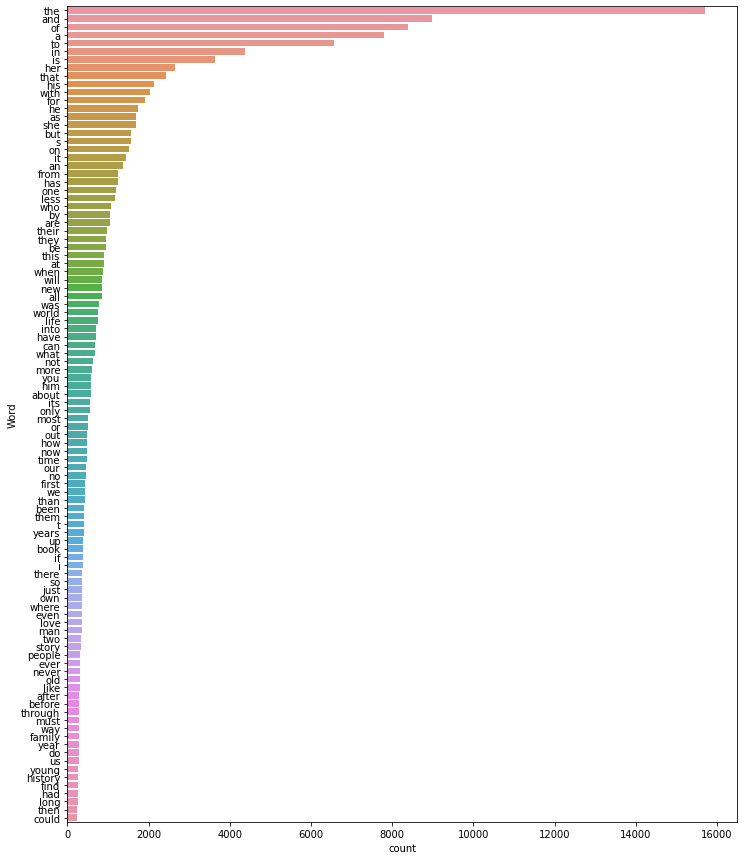

In [7]:
print("visualize the words and frequency in book's synopsis.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freqwords(books['synopsis'], 100)

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['synopsis'] = books['synopsis'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Displaying "synopsis" after removing stop words

print("books['synopsis']\n\n")
books['synopsis']

books['synopsis']




0       years ago least six human species inhabited ea...
1       diamond written book remarkable scope one impo...
2       book zinn presented different side history tra...
3       author erik larson imbues incredible events su...
4       discovered attic spent last years life anne fr...
                              ...                        
1534    atticus sullivan last druids lives peacefully ...
1535    charlie buckets wonderful adventure begins fin...
1536    live dream children born free says like land f...
1537    rose loves dimitri dimitri might love tasha ma...
1538    prince value brishen khaskem prince kai lived ...
Name: synopsis, Length: 1539, dtype: object

In [10]:
#Lemmatization on 'synopsis'
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

books['synopsis'] = books['synopsis'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#Displaying "synopsis" after Lemmmatization
print("Snapshot of books['synopsis']\n\n")

books['synopsis']

Snapshot of books['synopsis']




0       year ago least six human specie inhabited eart...
1       diamond written book remarkable scope one impo...
2       book zinn presented different side history tra...
3       author erik larson imbues incredible event sur...
4       discovered attic spent last year life anne fra...
                              ...                        
1534    atticus sullivan last druid life peacefully ar...
1535    charlie bucket wonderful adventure begin find ...
1536    live dream child born free say like land fathe...
1537    rose love dimitri dimitri might love tasha mas...
1538    prince value brishen khaskem prince kai lived ...
Name: synopsis, Length: 1539, dtype: object

In [12]:
#Stemming on 'synopsis'
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['synopsis'] = books['synopsis'].apply(lambda x: stemming(x))

In [13]:
print("Snapshot of books['synopsis']\n\n")

books['synopsis']

Snapshot of books['synopsis']




0       year ago least six human speci inhabit earth t...
1       diamond written book remark scope one import r...
2       book zinn present differ side histori tradit f...
3       author erik larson imbu incred event surround ...
4       discov attic spent last year life ann frank re...
                              ...                        
1534    atticu sullivan last druid life peac arizona r...
1535    charli bucket wonder adventur begin find one m...
1536    live dream child born free say like land fathe...
1537    rose love dimitri dimitri might love tasha mas...
1538    princ valu brishen khaskem princ kai live cont...
Name: synopsis, Length: 1539, dtype: object

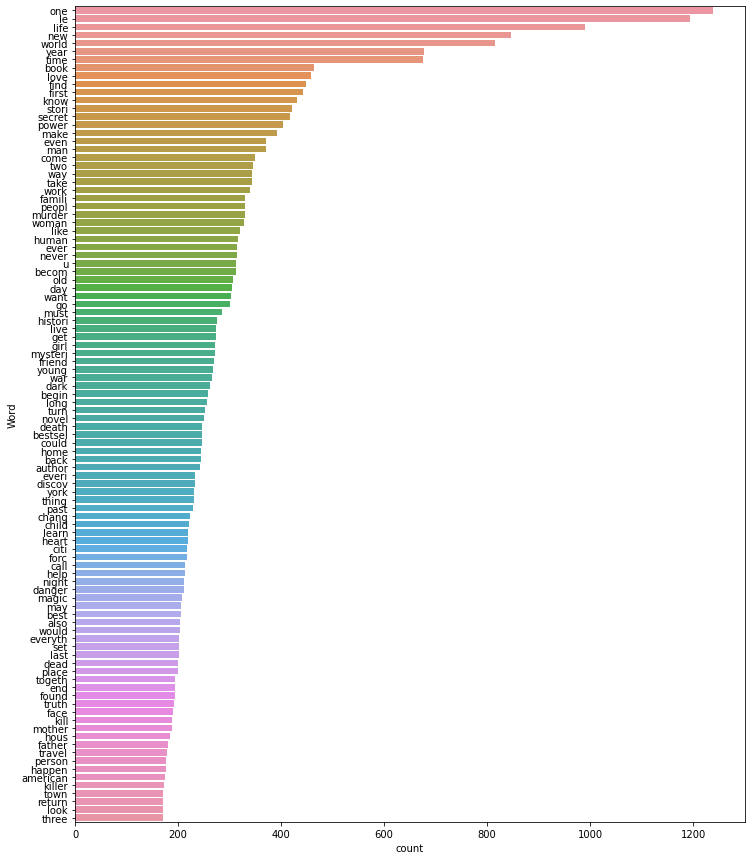

In [14]:
freqwords(books['synopsis'], 100)

In [15]:
#Labeling each 'genre' with an unique number 
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

y=LE.fit_transform(books['genre'])

In [16]:
#inverse mapping on the unique numbers
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['fantasy', 'history', 'horror', 'psychology', 'romance', 'science',
       'science_fiction', 'sports', 'thriller', 'travel'], dtype=object)

In [17]:
xtrain, xval, ytrain, yval = train_test_split(books['synopsis'], y, test_size=0.2, random_state=557) 

In [18]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

In [19]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance.
from sklearn.multiclass import OneVsRestClassifier

# Performance metric.
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data.
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set.
y_pred_lr = clf.predict(xval_tfidf)


from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  

#Calculating the accuracy.
print( 'Accuracy Score :',accuracy_score(yval,y_pred_lr) )

#Printing the classification report.
print ('Report : ')
print(classification_report(yval,y_pred_lr))


Accuracy Score : 0.6168831168831169
Report : 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00        18
           3       1.00      0.45      0.62        22
           4       0.50      0.04      0.08        23
           5       1.00      0.46      0.63        13
           6       0.00      0.00      0.00        13
           7       1.00      0.20      0.33        15
           8       0.47      0.99      0.64        92
           9       1.00      0.19      0.32        16

    accuracy                           0.62       308
   macro avg       0.66      0.36      0.40       308
weighted avg       0.65      0.62      0.55       308



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn import svm

svc = svm.SVC(kernel='linear').fit(xtrain_tfidf,ytrain)

svpred=svc.predict(xval_tfidf)

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
print( 'Accuracy Score :',accuracy_score(yval,svpred) )
print ('Report : ')
print(classification_report(yval,svpred))


Accuracy Score : 0.737012987012987
Report : 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.67      0.71      0.69        14
           2       1.00      0.06      0.11        18
           3       0.90      0.82      0.86        22
           4       0.67      0.17      0.28        23
           5       0.90      0.69      0.78        13
           6       1.00      0.08      0.14        13
           7       1.00      0.53      0.70        15
           8       0.61      0.99      0.75        92
           9       1.00      0.69      0.81        16

    accuracy                           0.74       308
   macro avg       0.86      0.56      0.60       308
weighted avg       0.79      0.74      0.69       308



In [21]:
def infertag(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = svc.predict(q_vec)
    return LE.inverse_transform(q_pred)[0]
    #return q_pred[0]


for i in range(50): 
  k = xval.sample(1).index[0] 
  
  print("\nBook: ", books['title'][k], )
  print("\nPredicted genre: ", infertag(xval[k]))
  print("\nActual genre: ",books['genre'][k], "\n")
  print("-------------------------------")



Book:  El psicoanalista

Predicted genre:  thriller

Actual genre:  thriller 

-------------------------------

Book:  The Girl with the Dragon Tattoo

Predicted genre:  thriller

Actual genre:  romance 

-------------------------------

Book:  Emotional Intelligence: Why It Can Matter More Than IQ

Predicted genre:  psychology

Actual genre:  psychology 

-------------------------------

Book:  Beautiful Creatures

Predicted genre:  thriller

Actual genre:  romance 

-------------------------------

Book:  Moon Called

Predicted genre:  fantasy

Actual genre:  fantasy 

-------------------------------

Book:  Four Seasons in Rome: On Twins, Insomnia, and the Biggest Funeral in the History of the World

Predicted genre:  thriller

Actual genre:  travel 

-------------------------------

Book:  Rebecca

Predicted genre:  fantasy

Actual genre:  romance 

-------------------------------

Book:  Velocity

Predicted genre:  thriller

Actual genre:  thriller 

-----------------------------

In [22]:
#Import data again for rating prediction
books=pd.read_csv('/content/DA-AI-ML-interview-assignment-Data.csv')

In [23]:
def clean(text):
    # remove comma 
    text = re.sub(",", "", text) 
    # replace k with 000
    text = re.sub("k", "000", text) 
    # remove decimal
    text = re.sub("\.", "", text) 
    # remove all characters only
    text = re.sub("[a-zA-Z]"," ",text) 
    return float(text)

books.loc[:,'num_ratings']=books.loc[:,'num_ratings'].apply(lambda x: clean(x))
books.loc[:,'num_reviews']=books.loc[:,'num_reviews'].apply(lambda x: clean(x))
books.loc[:,'num_followers']=books.loc[:,'num_followers'].apply(lambda x: clean(x))

In [24]:
books

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229.0,46149.0,305000.0,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056.0,12879.0,6538.0,"""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,224620.0,6509.0,2354.0,"In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157.0,36644.0,642000.0,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,3313033.0,35591.0,4621.0,Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,83827.0,7203.0,11905.0,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001.0,14252.0,22897.0,Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,1536,Red Rising,4.25,Pierce Brown,310138.0,30388.0,30510.0,"""I live for the dream that my children will be...",fantasy
1537,1537,Frostbite,4.26,Richelle Mead,337538.0,12435.0,66448.0,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


In [25]:
# creating new features 
books['ratings_occ'] = books['rating'] * books['num_ratings']
books['rate_weight'] = books['rating'] * books['num_reviews']
books['rate_weight_2'] = books['rating'] * books['num_followers']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


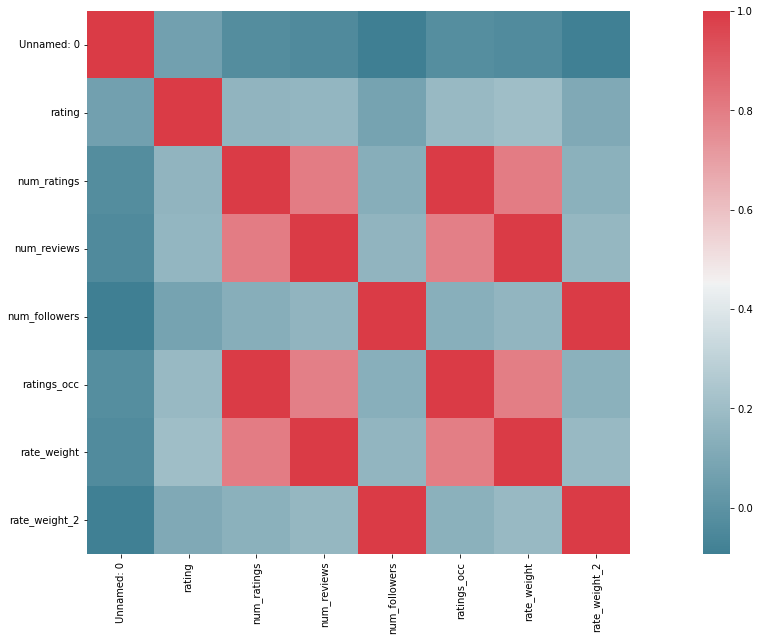

In [26]:
#Representation
fig = plt.gcf()
fig.set_size_inches(26, 10)
corr = books.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [27]:
books

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,ratings_occ,rate_weight,rate_weight_2
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229.0,46149.0,305000.0,"100,000 years ago, at least six human species ...",history,3539345.31,202594.11,1338950.00
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056.0,12879.0,6538.0,"""Diamond has written a book of remarkable scop...",history,1482906.24,52031.16,26413.52
2,2,A People's History of the United States,4.07,Howard Zinn,224620.0,6509.0,2354.0,"In the book, Zinn presented a different side o...",history,914203.40,26491.63,9580.78
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157.0,36644.0,642000.0,Author Erik Larson imbues the incredible event...,history,2446496.43,146209.56,2561580.00
4,4,The Diary of a Young Girl,4.18,Anne Frank,3313033.0,35591.0,4621.0,Discovered in the attic in which she spent the...,history,13848477.94,148770.38,19315.78
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,83827.0,7203.0,11905.0,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,342852.43,29460.27,48691.45
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001.0,14252.0,22897.0,Charlie Bucket's wonderful adventure begins wh...,fantasy,3216254.15,59145.80,95022.55
1536,1536,Red Rising,4.25,Pierce Brown,310138.0,30388.0,30510.0,"""I live for the dream that my children will be...",fantasy,1318086.50,129149.00,129667.50
1537,1537,Frostbite,4.26,Richelle Mead,337538.0,12435.0,66448.0,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,1437911.88,52973.10,283068.48


In [28]:
label = books['rating'].values
books.drop(['title', 'name', 'synopsis', 'genre', 'rating'], axis=1, inplace=True)

In [29]:
# Split the Data into 80% - 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(books, label, test_size=0.2)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(x_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  27.490655160958195 
Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 200}


In [31]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model  = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
model.score(x_test, y_test)


0.42792338993102585

In [32]:
#Ridge
from sklearn.linear_model import Ridge

model2 = Ridge()


model2.fit(x_train, y_train)

predictions = model2.predict(x_test)
model2.score(x_test, y_test)


0.4279233898626882

In [33]:
#random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}
grad_rf = GridSearchCV(model, parameters, refit=True, cv=10)
grad_rf.fit(x_train, y_train)
print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

Best Score:  37.254126779865686 
Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
